In [27]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv('Behavioral data3.csv')

df_majority = df[df['Privacy Exists']==0]
df_minority = df[df['Privacy Exists']==1]
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2750,     # to match minority class
                                 random_state=123) # reproducible results
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

X = df_downsampled.iloc[:, 1:-1].values
Y = df_downsampled.iloc[:, -1:].values


scaler = StandardScaler(); X = scaler.fit_transform(X)

X_new = SelectKBest(f_classif, k=102).fit_transform(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state = 5)

In [28]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
models = {
    'Gradient Boosting 10 feat': GradientBoostingClassifier(n_estimators=50,learning_rate=0.01,max_depth=2,subsample=0.7,min_samples_split=4,max_features=10),
    'Gradient Boosting 50 feat': GradientBoostingClassifier(n_estimators=50,learning_rate=0.01,max_depth=2,subsample=0.7,min_samples_split=4,max_features=50),
    '2-Gradient Boosting 40 feat': GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, max_depth=3, subsample=0.8 ,min_samples_split=6 ,max_features=40),
    '2-Gradient Boosting 85 feat': GradientBoostingClassifier(n_estimators=300, learning_rate=0.22, max_depth=4, subsample=0.8,min_samples_split=18,max_features=85)

}

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


for name, model in models.items():
    print('Training', name)

    clf = model
    clf = clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    scores_train = cross_val_score(clf, y_train, y_pred_train, cv=3)
    print('train cross val',scores_train.mean())
    scores_test = cross_val_score(clf, y_test, y_pred_test, cv=3)
    print('test cross val',scores_test.mean())

    scores_train = accuracy_score(y_train, y_pred_train)
    print('train acc',scores_train.mean())
    scores_test = accuracy_score(y_test, y_pred_test)
    print('test acc',scores_test.mean())
    print('\n')

Training Gradient Boosting 10 feat
train cross val 0.8568676025323424
test cross val 0.8626451262289412
train acc 0.6270300027525461
test acc 0.6187419768934531


Training Gradient Boosting 50 feat
train cross val 0.7550233966418937
test cross val 0.7458277753075441
train acc 0.6705202312138728
test acc 0.668806161745828


Training 2-Gradient Boosting 40 feat
train cross val 0.8464079273327828
test cross val 0.7400684254730496
train acc 0.8464079273327828
test acc 0.7400513478818999


Training 2-Gradient Boosting 85 feat
train cross val 0.9986237269474264
test cross val 0.7548157205671657
train acc 0.9986237269474264
test acc 0.754813863928113




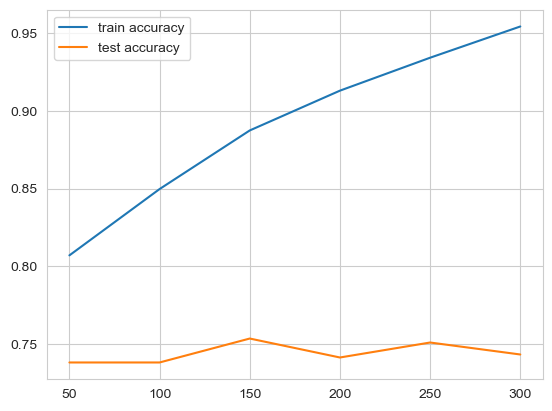

In [30]:
#hyperparameter Tune!!!!!!!!!!!!!!!!
import matplotlib.pyplot as plt
import seaborn as sns


train_accs_cross = []
test_accs_cross = []

train_accs_asaf = []
test_accs_asaf = []


rng = list(range(50,350,50))
#rng = [i / 100 for i in range(1,9)]
#rng = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
#rng = [7]

#     'AdaBoost' : AdaBoostClassifier(),

for eta in rng:
        
    clf = GradientBoostingClassifier(n_estimators=eta, learning_rate=0.2, max_depth=3, subsample=0.8 ,min_samples_split=6 ,max_features=40)

    clf = clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    scores_train_cross = cross_val_score(clf, y_train, y_pred_train, cv=3).mean()
    scores_test_cross = cross_val_score(clf, y_test, y_pred_test, cv=3).mean()
    
    scores_train_asaf = accuracy_score(y_train, y_pred_train).mean()
    scores_test_asaf = accuracy_score(y_test, y_pred_test).mean()

    train_accs_cross.append(scores_train_cross)
    test_accs_cross.append(scores_test_cross)

    train_accs_asaf.append(scores_train_asaf)
    test_accs_asaf.append(scores_test_asaf)

plt.figure()
sns.set_style("whitegrid")
plt.plot(rng,train_accs_cross, label="train accuracy")
plt.plot(rng,test_accs_cross, label="test accuracy")
plt.legend(loc="upper left")
plt.show()

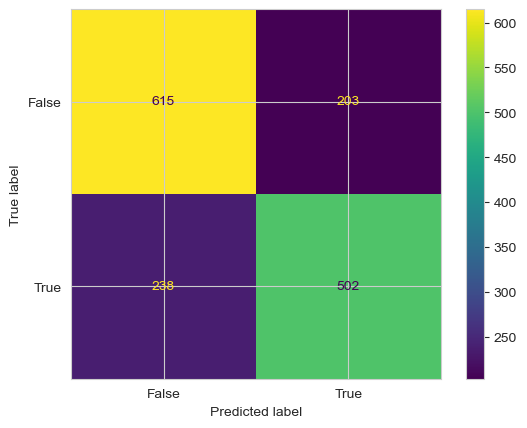

<Figure size 640x480 with 0 Axes>

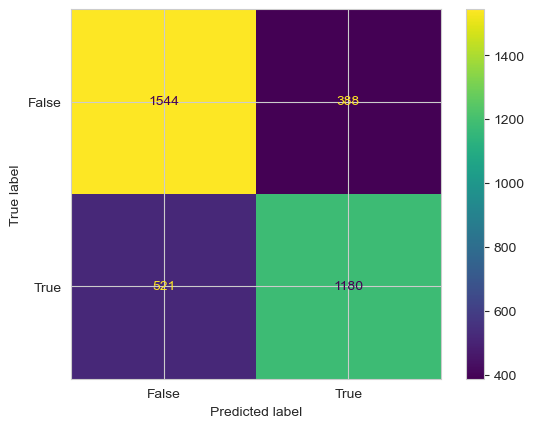

In [22]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_test, display_labels = [False, True])
cm_display.plot()
plt.show()
plt.figure()

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_train, display_labels = [False, True])
cm_display.plot()
plt.show()

In [48]:
#Who is Best!!!
max_value = max(test_accs_cross)
max_index = test_accs_cross.index(max_value)

print("Maximum value:", max_value)
print("Index of maximum value:", max_index)
print(list(rng)[max_index])

Maximum value: 0.843389654661331
Index of maximum value: 0
3
